In [ ]:
!pip install kaggle
from google.colab import files 
#files.open('/content/drive/MyDrive/Colab Notebooks/json kaggle')
files.upload() #download and upload json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d merahul28/covid19-vaccine-related-tweets

100% 91.0M/91.3M [00:01<00:00, 52.0MB/s]
100% 91.3M/91.3M [00:01<00:00, 75.5MB/s]


In [ ]:
!kaggle datasets download -d ritesh2000/covid19-vaccine-tweets

 50% 17.0M/34.1M [00:00<00:00, 20.0MB/s]
100% 34.1M/34.1M [00:01<00:00, 33.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-related-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############

from keras.preprocessing.text import Tokenizer         #######
from keras.preprocessing.sequence import pad_sequences #######
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM ####

from keras import utils
from keras.callbacks import ReduceLROnPlateau , EarlyStopping


#nltk

import nltk
from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######


from textblob import TextBlob # TextBlob - Python library for processing textual data
import random
np.random.seed(0)


# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
#load data 
df1 = pd.read_csv('/content/file.csv')
df2=pd.read_csv('/content/COVID-Vaccine Related tweets NOV1 to DEC16.csv')

In [ ]:
display(df2)

,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link
0,16-12-2020,04:37:24,1.369881e+08,beforethestars,Andrea Davison,"Vegetarians here is a reason ""AZD1222 (ChAdOx1...",en,[],[],[],0,3,3,[],https://twitter.com/beforethestars/status/1338...
1,16-12-2020,04:03:02,1.458063e+09,artofhitech,Техно Ньюс !,AstraZeneca начинает клинические испытания вак...,ru,[],[],[],0,0,0,[],https://twitter.com/ArtOfHiTech/status/1338975...
2,16-12-2020,03:39:43,1.412535e+07,n6mac41717,Chuck Han,@ByLizC 1) Let's see what the US Phase III tri...,en,[],[],[],0,0,0,[],https://twitter.com/n6mac41717/status/13389695...
3,16-12-2020,03:30:18,3.312676e+09,codigofmx,codigof.mx,"El pasado 11 de diciembre, el laboratorio Astr...",es,[],['http://ow.ly/iu8o50CMlt5'],['https://pbs.twimg.com/media/EpT3hY_W8AM6C_x....,0,0,4,[],https://twitter.com/codigofmx/status/133896714...
4,16-12-2020,01:39:04,9.536980e+17,ae1tt,"Deborah A Nicholas, M.D.",@sabrigley @IncognitoNewt @thespybrief Yep. Pu...,en,[],['https://www.thelancet.com/journals/lancet/ar...,[],1,0,6,[],https://twitter.com/AE1TT/status/1338939149072...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686100,01-11-2020,07:35:53,1.336240e+08,vrtarak,viggy,@imeghanavirat Kadhu India dhi covaxin valu ip...,in,[],[],[],3,0,0,[],https://twitter.com/VRtarak/status/13227214928...
686101,01-11-2020,07:33:47,1.039760e+18,tv9bharatvarsh,TV9 Bharatvarsh,#Covaxin के तीसरे फेज का ट्रायल जल्द होगा शुरू...,hi,[],['https://www.tv9bharatvarsh.com/india/corona-...,[],0,0,15,"['covaxin', 'coronavirus', 'covid19']",https://twitter.com/TV9Bharatvarsh/status/1322...
686102,01-11-2020,07:26:19,1.336240e+08,vrtarak,viggy,@imeghanavirat Russia la vaccine odaladame at ...,in,[],[],[],1,0,0,[],https://twitter.com/VRtarak/status/13227190842...
686103,01-11-2020,07:02:32,1.238370e+18,covidmexico,Covid México,ste candidato ha entrado en ensayos de Fase 2....,es,[],[],[],1,1,0,[],https://twitter.com/CovidMexico/status/1322713...


In [ ]:
df2.columns

Index(['date', 'time', 'user_id', 'username', 'name', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'link'],
      dtype='object')

In [ ]:
df2.head()

,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link
0,16-12-2020,04:37:24,1.369881e+08,beforethestars,Andrea Davison,"Vegetarians here is a reason ""AZD1222 (ChAdOx1...",en,[],[],[],0,3,3,[],https://twitter.com/beforethestars/status/1338...
1,16-12-2020,04:03:02,1.458063e+09,artofhitech,Техно Ньюс !,AstraZeneca начинает клинические испытания вак...,ru,[],[],[],0,0,0,[],https://twitter.com/ArtOfHiTech/status/1338975...
2,16-12-2020,03:39:43,1.412535e+07,n6mac41717,Chuck Han,@ByLizC 1) Let's see what the US Phase III tri...,en,[],[],[],0,0,0,[],https://twitter.com/n6mac41717/status/13389695...
3,16-12-2020,03:30:18,3.312676e+09,codigofmx,codigof.mx,"El pasado 11 de diciembre, el laboratorio Astr...",es,[],['http://ow.ly/iu8o50CMlt5'],['https://pbs.twimg.com/media/EpT3hY_W8AM6C_x....,0,0,4,[],https://twitter.com/codigofmx/status/133896714...
4,16-12-2020,01:39:04,9.536980e+17,ae1tt,"Deborah A Nicholas, M.D.",@sabrigley @IncognitoNewt @thespybrief Yep. Pu...,en,[],['https://www.thelancet.com/journals/lancet/ar...,[],1,0,6,[],https://twitter.com/AE1TT/status/1338939149072...


In [ ]:
from pandas import datetime 

df2['date'] = pd.to_datetime(df2['date'])
df2['Month'] = df2['date'].dt.month
df2['Month-str-full'] = df2['date'].dt.strftime('%B')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df2['Month-str-full'].value_counts()

November     235000
December     127569
October       61870
September     61747
August        39862
March         33318
February      31353
April         28618
May           21633
July          19290
June          14970
January       10875
Name: Month-str-full, dtype: int64

In [ ]:
print(min(df2['date']))
print(max(df2['date']))

2020-01-11 00:00:00
2020-12-16 00:00:00


In [ ]:
print(min(df1['date']))
print(max(df1['date']))

2020-02-12
2020-10-22


In [ ]:
df2 = df2[df2['language']=='en']
df2 = df2[['date' , 'tweet']]

In [ ]:
df1 = df1[df1['language']=='en']
df1 = df1[['date' , 'tweet']]

In [ ]:
df1.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
5,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
df2.head()

,date,tweet
0,2020-12-16,"Vegetarians here is a reason ""AZD1222 (ChAdOx1..."
2,2020-12-16,@ByLizC 1) Let's see what the US Phase III tri...
4,2020-12-16,@sabrigley @IncognitoNewt @thespybrief Yep. Pu...
5,2020-12-16,@IncognitoNewt @thespybrief Lancet published i...
6,2020-12-16,AZD1222 Oxford Phase III trials interim analys...


In [ ]:

df2['tweet'].isna().sum()

0

In [ ]:
df2['date'].isna().sum()

0

In [ ]:
df1['tweet'].isna().sum()

0

In [ ]:
df1['date'].isna().sum()

0

In [ ]:
print(df1.shape)
print(df2.shape)

(201030, 2)
(573016, 2)


In [ ]:
data = pd.concat([df1,df2],ignore_index=True)
data.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
4,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
data.shape

(774046, 2)

In [ ]:
data.drop_duplicates(subset=['tweet'])
data.shape

(774046, 2)

In [ ]:
data['process_tweet'] = data['tweet'].copy()
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,Now states shall have wait for thier Vidhan Sa...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,@MisseeMonis They said vaccine for all but not...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...","BJP really presenting ""free COVID vaccine"" as ..."
4,2020-10-22,Another dose of daily miserablism from Planet ...,Another dose of daily miserablism from Planet ...


# Preprocessing the Tweet


In [ ]:
def clean_data(txt):
  txt = txt.lower()  # lowercase
  txt = re.sub(r'@[A-Za-z0-9_]+' , '' , txt)   #remove mentions
  txt = re.sub(r'#' , '' , txt) #remove hashtags
  txt = re.sub(r'RT : ','' , txt) # remove retweets
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , txt) #removes url
  txt = re.sub('\[.*?\]' , '' , txt) #remove square brackets
  txt = re.sub(r'[^\w\s]' , '' , txt) #remove puntuations
  txt = re.sub('\w*\d\w*' , '' ,txt) #removes words containig numbers
  txt = re.sub('\n' , '' ,txt) #remove new lines
 

  return txt


In [ ]:
data['process_tweet'] = data['process_tweet'].apply(clean_data)
data['process_tweet']

0          isnt it the best poll promise ever free covid...
1         now states shall have wait for thier vidhan sa...
2          they said vaccine for all but not when free c...
3         bjp really presenting free covid vaccine as a ...
4         another dose of daily miserablism from planet ...
                                ...                        
774041    covaxin has been developed in collaboration wi...
774042    bharat biotech is planning to launch its vacci...
774043     vaccine amu medical college to begin covaxin ...
774044    bharat biotech to launch covaxin in    india n...
774045    the aiims in delhi is likely to submit a propo...
Name: process_tweet, Length: 774046, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removig stop words

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt):
  rmv_stpwords = [i for i in txt.split() if i not in stopwords]
  rmv_stpwords_join = ' '.join(rmv_stpwords)
  return rmv_stpwords_join

 

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(remove_stopwords)

data.head()#after removing stopwords

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promise ever free covid vaccine...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,states shall wait thier vidhan sabha election ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccine free covid vaccine new lakhs rs e...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp really presenting free covid vaccine state...
4,2020-10-22,Another dose of daily miserablism from Planet ...,another dose daily miserablism planet grauniad...


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
def stemming(txt):
  txt =[st.stem(word) for word in txt.split()]
  txt_join = ' '.join(txt)
  return txt_join

#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(stemming)
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.7MB/s 


In [ ]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
data['Polarity_Vader'] = data['process_tweet'].apply(lambda txt: sid.polarity_scores(txt)['compound'])
data.head()

,date,tweet,process_tweet,Polarity_Vader
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,-0.7482
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.0000
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.7717
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.7964
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.4404


# Labeling

5 labels: 
strongly positive,
positive,
nuteral,
negative,
strongly negetative.


In [ ]:

def get_text_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
#add 2 columns(subjectivity and polarity) to the data

#data['Subjectivity'] = data['process_tweet'].apply(get_text_subjectivity)

data['Polarity_textblob'] = data['process_tweet'].apply(get_text_polarity)

In [ ]:

#Labeling
def get_text_analysis(i):
  if (i<-0.5):
    return 'Strongly Negative'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Negative'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Positive'
  else:
    return 'Strongly Positive'



In [ ]:
data['Sentiment_TB'] = data['Polarity_textblob'].apply(get_text_analysis)
data['Sentiment_VADER'] = data['Polarity_Vader'].apply(get_text_analysis)

In [ ]:
data.head()

,date,tweet,process_tweet,Polarity_Vader,Polarity_textblob,Sentiment_TB,Sentiment_VADER
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,-0.7482,0.197500,Positive,Strongly Negative
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.0000,0.800000,Strongly Positive,Neutral
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.7717,0.378788,Positive,Strongly Positive
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.7964,0.500000,Positive,Strongly Positive
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.4404,0.000000,Neutral,Positive


In [ ]:
possible_labels = data.Sentiment_TB.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label_TB'] = data.Sentiment_TB.replace(label_dict)



In [ ]:
#possible_labels = data.Sentiment_VADER.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label_VD'] = data.Sentiment_VADER.replace(label_dict)


In [ ]:
possible_labels

array(['Positive', 'Strongly Positive', 'Neutral', 'Negative',
       'Strongly Negative'], dtype=object)

In [ ]:
df=data[['date','Sentiment_TB' ,'label_TB','Sentiment_VADER' ,'label_VD']]
data = data[['process_tweet','Sentiment_TB' ,'label_TB','Sentiment_VADER' ,'label_VD']]
data.head()



,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,isnt best poll promis ever free covid vaccin v...,Positive,0,Strongly Negative,4
1,state shall wait thier vidhan sabha elect get ...,Strongly Positive,1,Neutral,2
2,said vaccin free covid vaccin new lakh rs ever...,Positive,0,Strongly Positive,1
3,bjp realli present free covid vaccin state man...,Positive,0,Strongly Positive,1
4,anoth dose daili miserabl planet grauniad sub ...,Neutral,2,Positive,0


In [ ]:
from pandas import datetime 

df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Month-str-full'] = df['date'].dt.strftime('%B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
possible_months = df['Month-str-full'].unique()
print(possible_labels)
print(possible_months)

['Positive' 'Strongly Positive' 'Neutral' 'Negative' 'Strongly Negative']
['October' 'September' 'August' 'July' 'June' 'May' 'April' 'March'
 'February' 'December' 'November' 'January']


In [ ]:
df.head()

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD,Month,Month-str-full
0,2020-10-22,Positive,0,Strongly Negative,4,10,October
1,2020-10-22,Strongly Positive,1,Neutral,2,10,October
2,2020-10-22,Positive,0,Strongly Positive,1,10,October
3,2020-10-22,Positive,0,Strongly Positive,1,10,October
4,2020-10-22,Neutral,2,Positive,0,10,October


In [ ]:
df['Month-str-full'].value_counts()

November     194118
December     109639
September    106590
August        77587
October       76572
July          50109
April         33751
May           33423
March         29425
February      28447
June          25018
January        9367
Name: Month-str-full, dtype: int64

In [ ]:
for i in possible_months:
  for j in possible_labels:
    a = []
    count = np.sum((df['Month-str-full']==i) & (df['Sentiment_TB']==j))
  
    print(i, " month and ", j, "sentiment values count ", count)
  
  print()

October  month and  Positive sentiment values count  22649
October  month and  Strongly Positive sentiment values count  3558
October  month and  Neutral sentiment values count  37578
October  month and  Negative sentiment values count  11688
October  month and  Strongly Negative sentiment values count  1099

September  month and  Positive sentiment values count  33134
September  month and  Strongly Positive sentiment values count  6123
September  month and  Neutral sentiment values count  51508
September  month and  Negative sentiment values count  14474
September  month and  Strongly Negative sentiment values count  1351

August  month and  Positive sentiment values count  25876
August  month and  Strongly Positive sentiment values count  3013
August  month and  Neutral sentiment values count  37513
August  month and  Negative sentiment values count  10303
August  month and  Strongly Negative sentiment values count  882

July  month and  Positive sentiment values count  14960
July  m

In [ ]:
for i in possible_months:
  for j in possible_labels:
    count = np.sum((df['Month-str-full']==i) & (df['Sentiment_VADER']==j))
    print(i, " month and ", j, "sentiment values count ", count)
  print()

October  month and  Positive sentiment values count  16616
October  month and  Strongly Positive sentiment values count  10760
October  month and  Neutral sentiment values count  30196
October  month and  Negative sentiment values count  11058
October  month and  Strongly Negative sentiment values count  7942

September  month and  Positive sentiment values count  24886
September  month and  Strongly Positive sentiment values count  15665
September  month and  Neutral sentiment values count  41221
September  month and  Negative sentiment values count  14520
September  month and  Strongly Negative sentiment values count  10298

August  month and  Positive sentiment values count  16202
August  month and  Strongly Positive sentiment values count  10107
August  month and  Neutral sentiment values count  33953
August  month and  Negative sentiment values count  10136
August  month and  Strongly Negative sentiment values count  7189

July  month and  Positive sentiment values count  10816
Ju

In [ ]:
data.to_csv('process_vaccine_tweet.csv')

In [ ]:
df_new = data.copy()

#df_new.rename(columns={'Sentiment' : 'Data'} , inplace= True)

df_new.head()

,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,isnt best poll promis ever free covid vaccin v...,Positive,0,Strongly Negative,4
1,state shall wait thier vidhan sabha elect get ...,Strongly Positive,1,Neutral,2
2,said vaccin free covid vaccin new lakh rs ever...,Positive,0,Strongly Positive,1
3,bjp realli present free covid vaccin state man...,Positive,0,Strongly Positive,1
4,anoth dose daili miserabl planet grauniad sub ...,Neutral,2,Positive,0


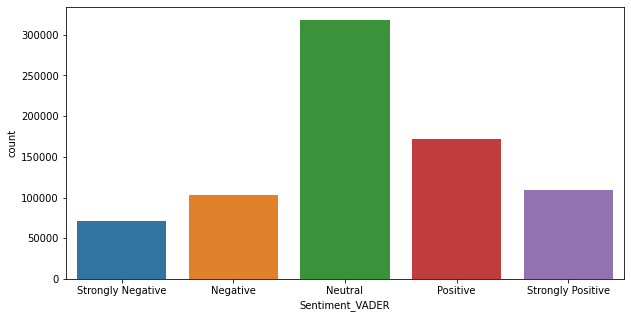

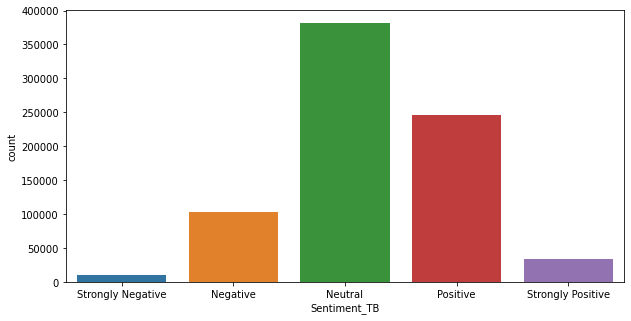

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment_VADER', data=df_new, order=['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']);




plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment_TB', data=df_new, order=['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']);

In [ ]:
data.to_csv('Vaccine_Label_Data_Stream.csv')

Text(0, 0.5, 'Num of Tweet ')

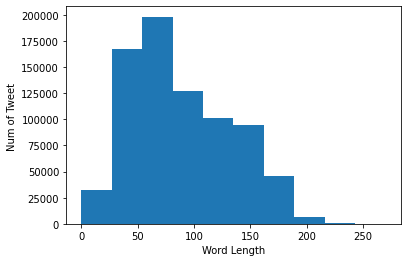

In [ ]:
data['process_tweet'].str.len().plot.hist()
plt.xlabel('Word Length')
plt.ylabel('Num of Tweet ')

In [ ]:
#import library for deep learning
from sklearn.model_selection import train_test_split


from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



```
`# This is formatted as code`
```

# **FOR TextBlob ONLY**

In [ ]:

#for deep learning we need to only 2 colums(sentiment and process tweet)
data = data[['Sentiment_TB','process_tweet' ]]
data.head()

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
data1 = data.copy()      #########    for experiment ,max_words

In [ ]:
data1.head()

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
data1 = data1.reset_index(drop=True) #for removing missig index 

#see previous index 3 is replaced by new index 2
data1.head() 

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
uniqueWords = list(set(" ".join(data['process_tweet']).lower().split(" ")))
count = len(uniqueWords)
print(count)

165769


In [ ]:
#tokenization
tokenizer = Tokenizer(num_words=count, split=' ')
#num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.


tokenizer.fit_on_texts(data1['process_tweet'].values)

X = tokenizer.texts_to_sequences(data1['process_tweet'].values)

In [ ]:
X[:3] #before padding

[[265,
  299,
  531,
  209,
  202,
  136,
  2,
  1,
  181,
  1893,
  80,
  17,
  181,
  72,
  2445,
  118,
  159,
  1049,
  292,
  1,
  83,
  885,
  1893,
  5905,
  14259,
  123,
  399,
  97,
  1539,
  297,
  690],
 [83, 1612, 80, 8560, 62752, 12479, 130, 4, 2, 1, 14260],
 [54, 1, 136, 2, 1, 28, 2133, 1620, 167, 978, 756, 6410]]

In [ ]:
#padding to make all text vector to same length

X = pad_sequences(X)

X[:3] #after padding

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   265,   299,   531,   209,   202,   136,     2,
            1,   181,  1893,    80,    17,   181,    72,  2445,   118,
          159,  1049,   292,     1,    83,   885,  1893,  5905, 14259,
          123,   399,    97,  1539,   297,   690],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,    83,  1612,    80,  8560, 62752,
        12479,   130,     4,     2,     1, 14260],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    

In [ ]:
X.shape[1]

51

In [ ]:
from keras.layers import MaxPool1D

In [ ]:
#cnn

model = Sequential()

#embedding_layer = Embedding(count, 256, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(Embedding(count, 256 , input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 51, 256)           42436864  
_________________________________________________________________
dropout_4 (Dropout)          (None, 51, 256)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 44, 128)           262272    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 22, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 14085     
Total params: 42,713,221
Trainable params: 42,713,221
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
#one hot encoding

y = pd.get_dummies(data1['Sentiment_TB']).values

[print(data1['Sentiment_TB'][i] ,y[i]) for i in range(0,5)]

Positive [0 0 1 0 0]
Strongly Positive [0 0 0 0 1]
Positive [0 0 1 0 0]
Positive [0 0 1 0 0]
Neutral [0 1 0 0 0]


[None, None, None, None, None]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 22)

In [ ]:
#trannig model
batch_size = 128
epochs = 5

In [ ]:
history = model.fit(x_train , y_train ,
          epochs = epochs,
          batch_size = batch_size,
          validation_split=0.1,
          verbose=1)

Epoch 1/5
4354/4354 [==============================] - 1671s 374ms/step - loss: 0.2432 - accuracy: 0.9185 - val_loss: 0.0420 - val_accuracy: 0.9895
Epoch 2/5
4354/4354 [==============================] - 1626s 374ms/step - loss: 0.0344 - accuracy: 0.9911 - val_loss: 0.0479 - val_accuracy: 0.9882
Epoch 3/5
4354/4354 [==============================] - 1627s 374ms/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.0531 - val_accuracy: 0.9888
Epoch 4/5
4354/4354 [==============================] - 1624s 373ms/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0548 - val_accuracy: 0.9892
Epoch 5/5
4354/4354 [==============================] - 1624s 373ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0573 - val_accuracy: 0.9899


In [ ]:
predictions = model.predict(x_test)
print('done')

done


In [ ]:
print(predictions)

[[1.30375061e-04 9.99162912e-01 6.94713322e-04 7.63864648e-07
  1.11479703e-05]
 [1.04433703e-07 2.44110902e-06 9.99997497e-01 2.25180072e-31
  4.77926440e-15]
 [1.00530924e-04 9.99759257e-01 1.38278541e-04 8.92383923e-07
  9.53615654e-07]
 ...
 [6.81705803e-10 8.14821215e-06 9.99991894e-01 3.17317869e-25
  1.70435559e-08]
 [1.03306266e-15 2.42313981e-13 1.00000000e+00 0.00000000e+00
  9.08721286e-13]
 [6.84278784e-05 9.99835968e-01 9.26809735e-05 1.43172610e-06
  1.44193609e-06]]


In [ ]:
%%time
score = model.evaluate(x_test, y_test , batch_size = batch_size)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1210/1210 [==============================] - 5s 4ms/step - loss: 0.0581 - accuracy: 0.9891

ACCURACY: 0.9891350865364075
LOSS: 0.05811479687690735
CPU times: user 4.47 s, sys: 438 ms, total: 4.91 s
Wall time: 5.13 s


In [ ]:
[print(data1['process_tweet'][i], predictions[i], y_test[i] ) for i in range(1, 3)
]

state shall wait thier vidhan sabha elect get covid vaccin biharpol [1.0443370e-07 2.4411090e-06 9.9999750e-01 2.2518007e-31 4.7792644e-15] [0 0 1 0 0]
said vaccin free covid vaccin new lakh rs everi account kind jumla [1.00530924e-04 9.99759257e-01 1.38278541e-04 8.92383923e-07
 9.53615654e-07] [0 1 0 0 0]


[None, None]

In [ ]:

pred1 = np.argmax(predictions , axis=1)
pred1[:10]

array([1, 2, 1, 1, 4, 1, 1, 1, 1, 1])

In [ ]:
y_test = np.argmax(y_test , axis=1)


In [ ]:


print(y_train.shape)
print(x_train.shape)  #160824 trainnig data

(619236, 5)
(619236, 51)


In [ ]:
print(y_test.shape)
print(x_test.shape)     #40206 test data

(154810,)
(154810, 51)


In [ ]:
print(confusion_matrix(y_test , pred1 ,normalize=None))

[[19966   112   351    58     0]
 [  108 76017   228     1     2]
 [  270    52 48696     0   235]
 [   87     1     0  1882     0]
 [    0     0   177     0  6567]]


In [ ]:
print(confusion_matrix(y_test , pred1))

[[19966   112   351    58     0]
 [  108 76017   228     1     2]
 [  270    52 48696     0   235]
 [   87     1     0  1882     0]
 [    0     0   177     0  6567]]


In [ ]:
print(classification_report(y_test , pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     20487
           1       1.00      1.00      1.00     76356
           2       0.98      0.99      0.99     49253
           3       0.97      0.96      0.96      1970
           4       0.97      0.97      0.97      6744

    accuracy                           0.99    154810
   macro avg       0.98      0.98      0.98    154810
weighted avg       0.99      0.99      0.99    154810



In [ ]:
accuracy_score(y_test , pred1)

0.9891350687940056

In [ ]:
print(confusion_matrix(y_test , pred1))

[[19966   112   351    58     0]
 [  108 76017   228     1     2]
 [  270    52 48696     0   235]
 [   87     1     0  1882     0]
 [    0     0   177     0  6567]]


In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred1)

0.0385181835798721

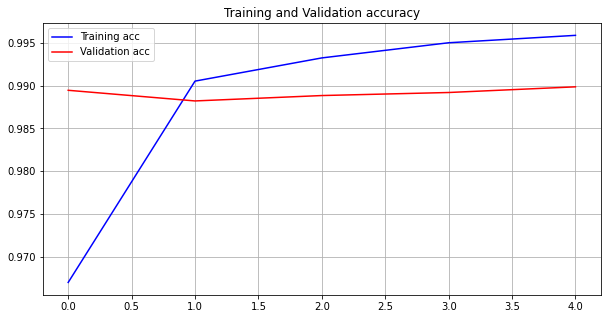

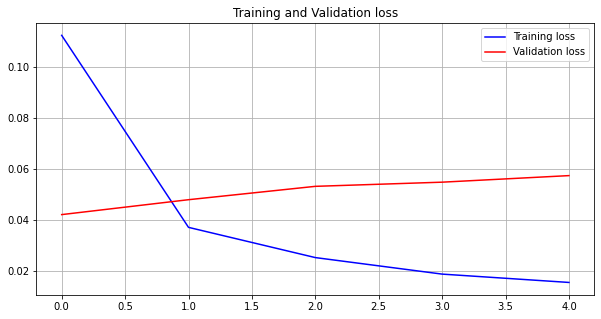

In [ ]:
plt.figure(figsize=(10,5))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.grid(True)
 
plt.figure(figsize=(10,5))
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.grid(True)
plt.legend()

plt.show()


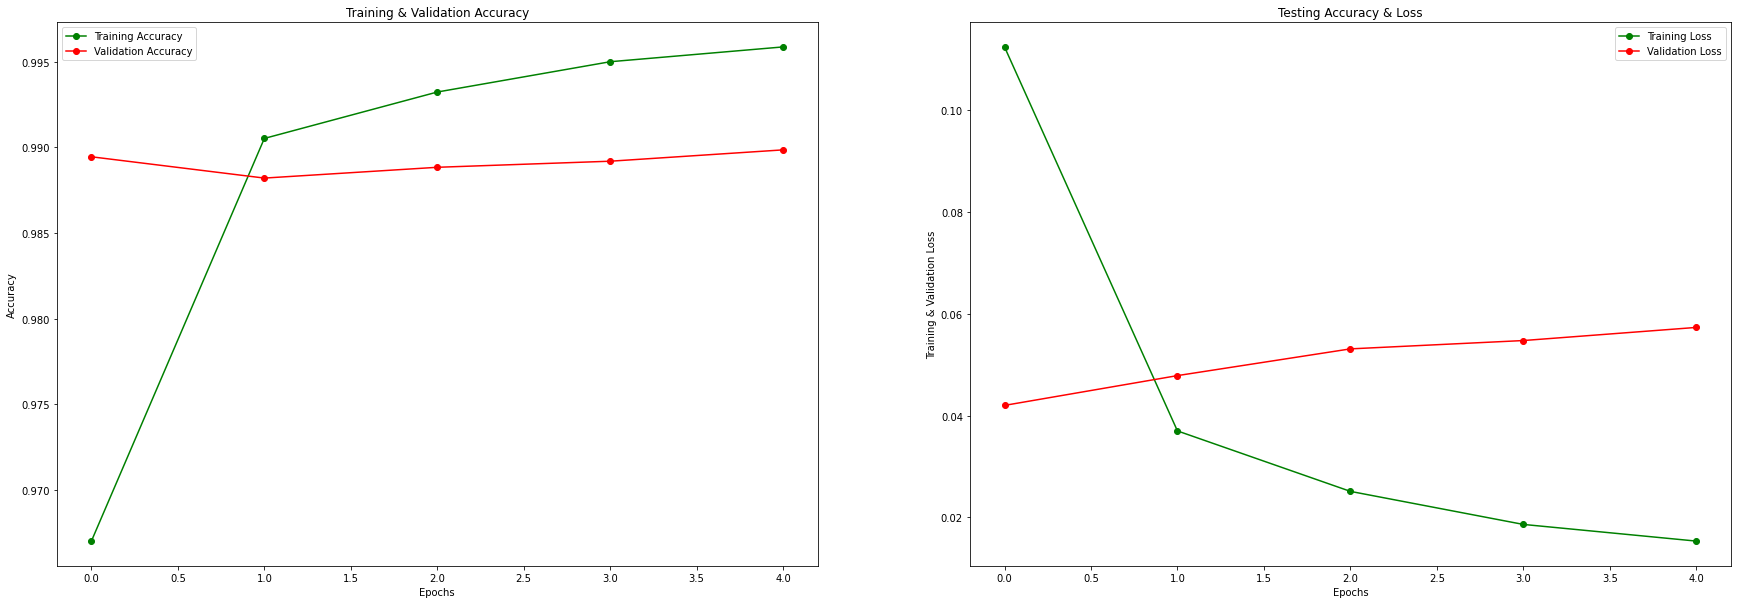

In [ ]:

epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')

ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

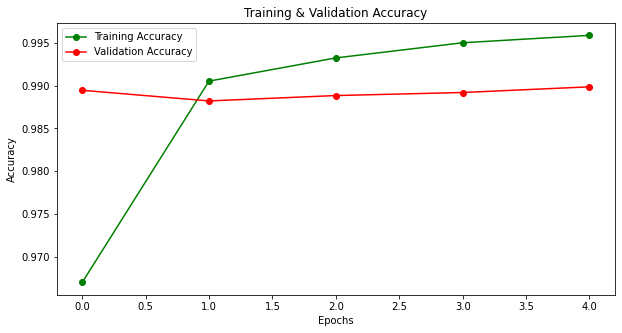

In [ ]:

epochs = [i for i in range(5)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))


plt.plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

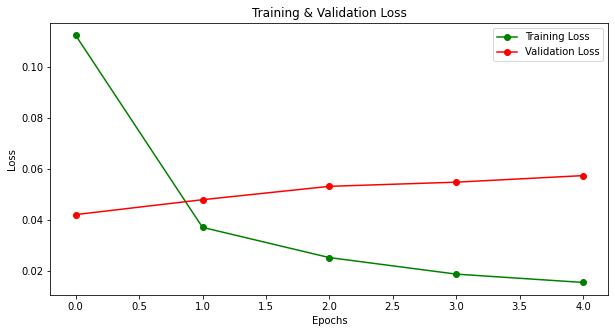

In [ ]:
epochs = [i for i in range(5)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))


plt.plot(epochs , train_loss , 'go-' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
plt.title('Training & Validation Loss')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [ ]:
y_test

array([1, 2, 1, ..., 2, 2, 1])

In [ ]:
pred1

array([1, 2, 1, ..., 2, 2, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



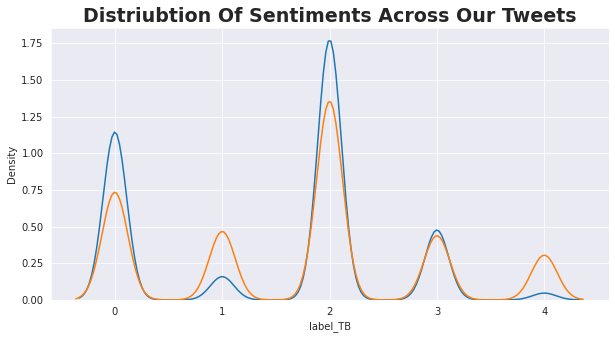

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df['label_TB'],bw=0.1)
sns.kdeplot(df['label_VD'],bw=0.1)




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



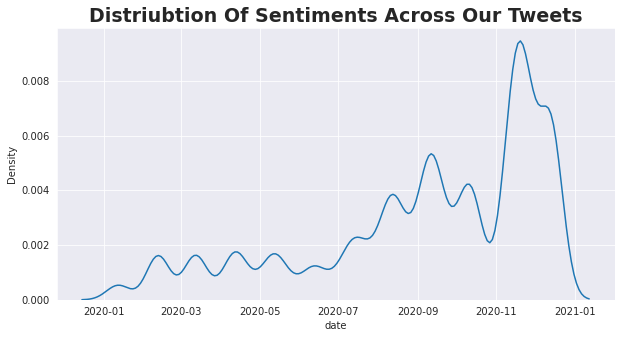

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df['date'],bw=0.1)



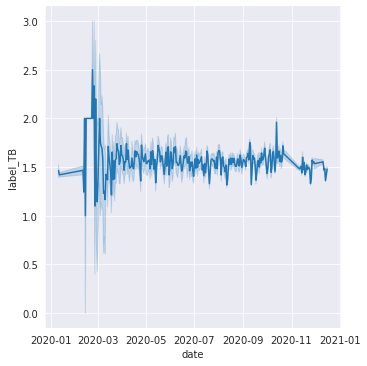

In [ ]:
sns.relplot(
    data=df, kind="line",
    x=df['date'], y=df['label_TB']
  

)

<Figure size 720x360 with 0 Axes>

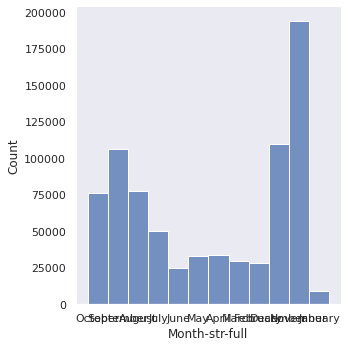

In [ ]:
plt.figure(figsize=(10,5))


sns.displot(data=df, col=df['Sentiment_TB'], x=df['Month-str-full'])

<Figure size 720x360 with 0 Axes>

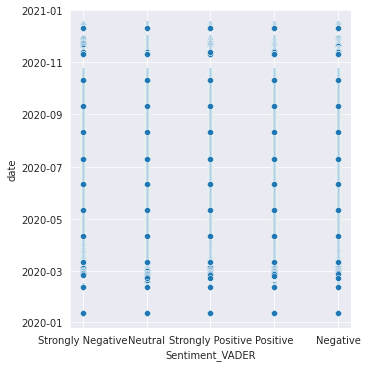

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.relplot(x='Sentiment_VADER', y=df['date'],data=df);





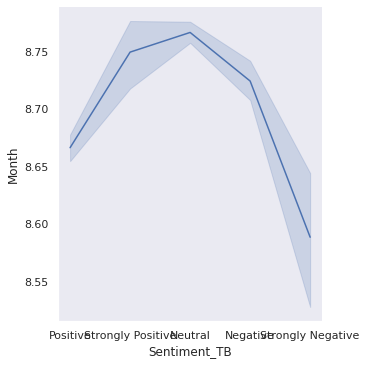

In [ ]:
import seaborn as sns

sns.set_theme(style="dark")


# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    y="Month", x="Sentiment_TB", 
    kind="line", palette="crest",
    legend=False,
)